# Example from Webpage on Autocorrelation for S&P and Eurostoxx using AR() plus BIC

http://quantdare.com/2016/03/autoregressive-model-sp500-and-euro-stoxx-50e/

In [4]:
%matplotlib inline
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics import tsaplots
from pandas.io.data import DataReader
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pylab
pylab.rcParams['figure.figsize'] = (12, 8)

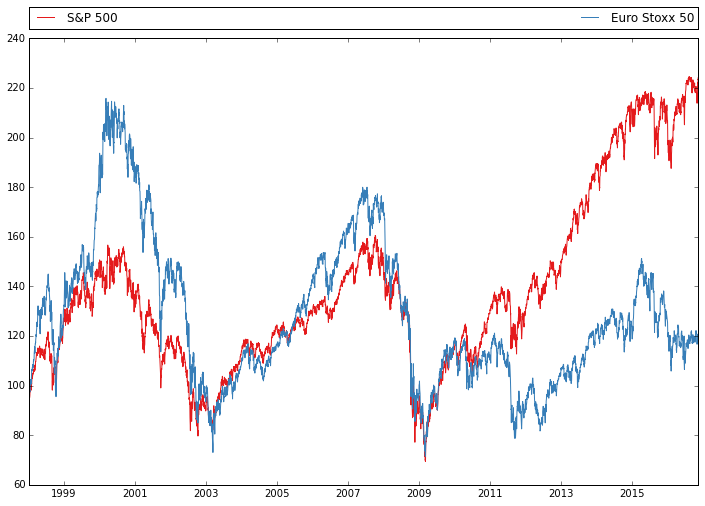

In [5]:
ini = datetime(1998,1,1)
end = datetime.today()
spx = DataReader('^GSPC', 'yahoo', ini, end)
stx = DataReader('^STOXX50E', 'yahoo', ini, end)
 
## Indexes spot.
spx = spx['Close']/spx['Close'][0]*100
stx = stx['Close']/stx['Close'][0]*100
 
# Colours (S&P 500, Euro Stoxx 50).
c = ['#e41a1c','#377eb8']
 
## Spot comparison.
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(spx.index, spx, label='S&P 500', c=c[0], lw=1.)
ax.plot(stx.index, stx, label='Euro Stoxx 50', c=c[1], lw=1.)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode='expand', borderaxespad=0.)


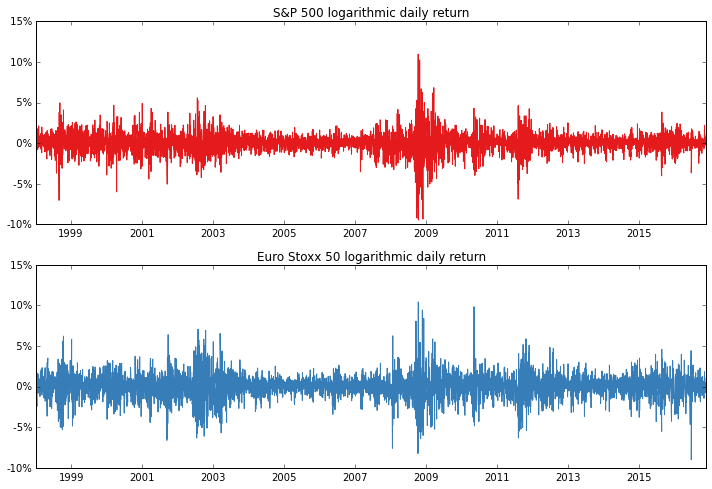

In [6]:
lr_spx = np.log(np.divide(spx[1:], spx[0:-1]))
lr_stx = np.log(np.divide(stx[1:], stx[0:-1]))
 
## Logarithmic daily returns comparison (two subplots).
# S&P 500 logarithmic daily returns plot.
f = plt.figure()
ax = f.add_subplot(211)
ax.plot(lr_spx.index, lr_spx, c=c[0], lw=1.)
ax.set_title('S&P 500 logarithmic daily return')
# Y-axis ticks to percentage.
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals]) 
 
# Euro Stoxx 50 logarithmic daily returns plot.
ax = f.add_subplot(212)
ax.plot(lr_stx.index, lr_stx, c=c[1], lw=1.)
ax.set_title('Euro Stoxx 50 logarithmic daily return')
# Y-axis ticks to percentage.
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals]) 


/Users/mrefermat/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


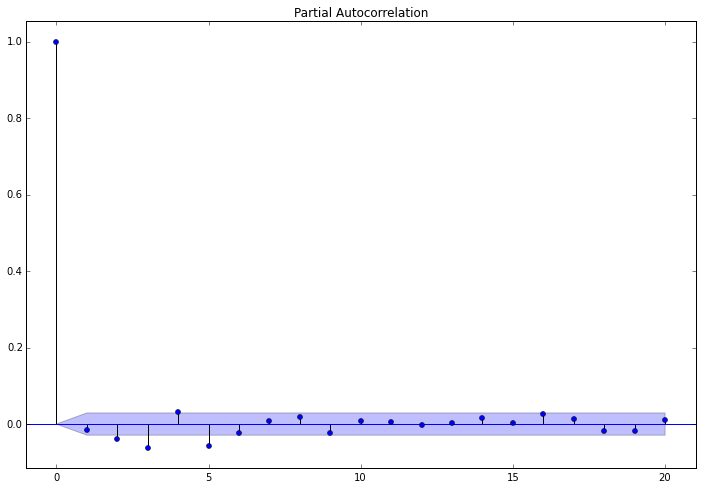

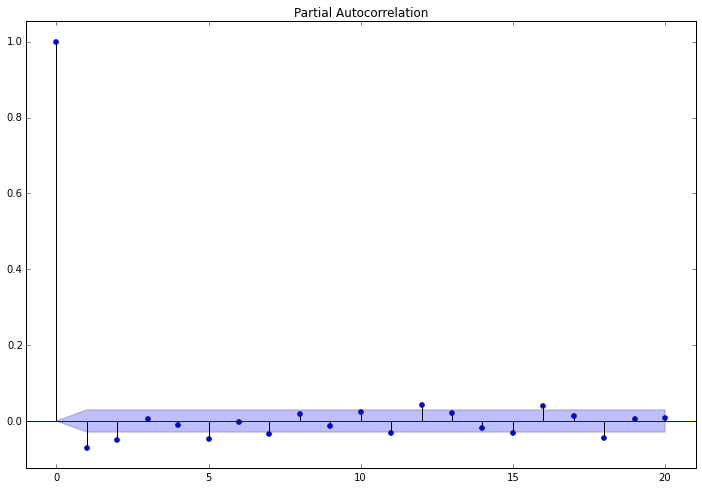

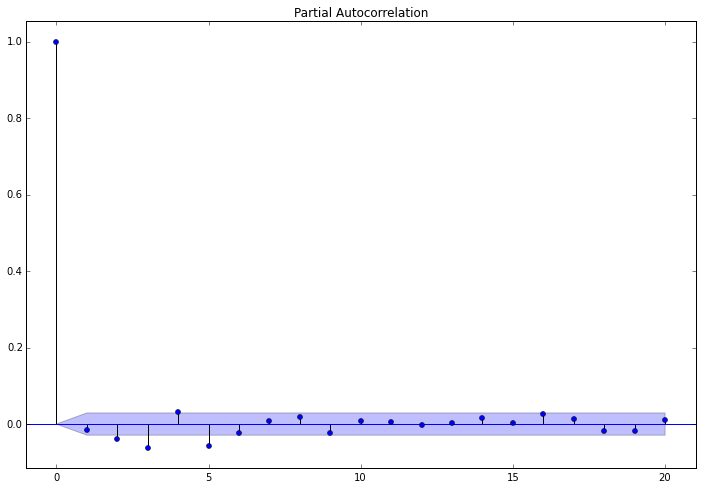

In [7]:
# Last date in which the return is known.
ini_spx = lr_spx.index.get_loc(datetime(2015,10,21))
ini_stx = lr_stx.index.get_loc(datetime(2015,10,21))
 
# Partial autocorrelation.
tsaplots.plot_pacf(lr_spx[:ini_spx+1], lags=20, alpha=.05)
tsaplots.plot_pacf(lr_stx[:ini_stx+1], lags=20, alpha=.05)


In [8]:
lr_simu_spx = lr_spx.copy()
s_spx = np.zeros((2,1))
 
for t in range(ini_spx+1,len(spx)-1):
        # model = AR(lr_spx[:ini_spx+1]) # Fixed window
        # model = AR(lr_spx[t-780:t]) # Rolling window
        model = AR(lr_spx[:t]) # Expansive window
 
        result = model.fit(maxlag=20, ic='bic')
 
        lr_simu_spx[t] = model.predict(result.params)[-1]
        # lr_simu_spx[t] = np.dot(result.model.X[-1,:],result.params)
 
        if np.equal(np.sign(lr_simu_spx[t]),np.sign(lr_spx[t])):
                s_spx[1] = s_spx[1]+1
        else:
                s_spx[0] = s_spx[0]+1


In [10]:
lr_simu_stx = lr_spx.copy()
s_stx = np.zeros((2,1))
 
for t in range(ini_stx+1,len(spx)-1):
        # model = AR(lr_spx[:ini_spx+1]) # Fixed window
        # model = AR(lr_spx[t-780:t]) # Rolling window
        model = AR(lr_stx[:t]) # Expansive window
 
        result = model.fit(maxlag=20, ic='bic')
 
        lr_simu_stx[t] = model.predict(result.params)[-1]
        # lr_simu_spx[t] = np.dot(result.model.X[-1,:],result.params)
 
        if np.equal(np.sign(lr_simu_stx[t]),np.sign(lr_stx[t])):
                s_stx[1] = s_stx[1]+1
        else:
                s_stx[0] = s_stx[0]+1

ValueError: x and y must have same first dimension

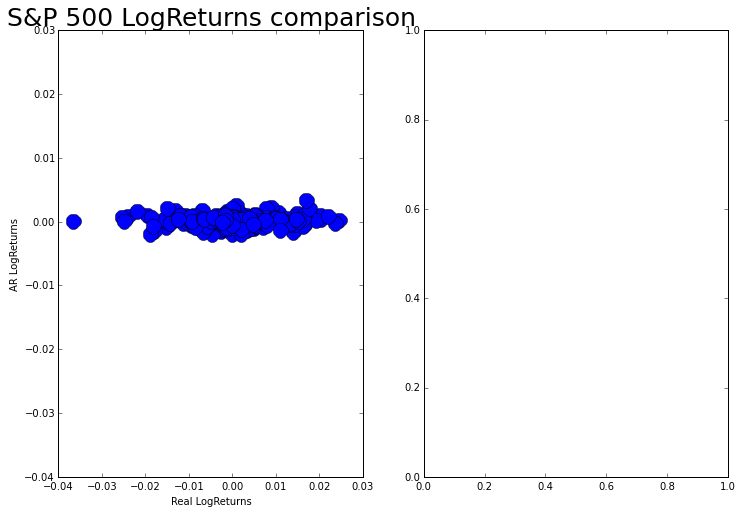

In [11]:
xl = 'Real LogReturns' # X-axis label
yl = 'AR LogReturns' # Y-axis label
m = 'o' # Marker
ms = 15 # Marker size
 
## Scatter plot.
f = plt.figure()
ax = f.add_subplot(121)
ax.plot(lr_spx[ini_spx+1:], lr_simu_spx[ini_spx+1:], c=c[0], lw=0, marker=m, ms=ms)
xmin,xmax = ax.get_xlim()
ax.set_ylim((xmin,xmax))
ax.set_xlabel(xl)
ax.set_ylabel(yl)
ax.set_title('S&P 500 LogReturns comparison', size=25)
 
ax = f.add_subplot(122)
ax.plot(lr_stx[ini_stx+1:], lr_simu_stx[ini_stx+1:], c=c[1], lw=0, marker=m, ms=ms)
xmin,xmax = ax.get_xlim()
ax.set_ylim((xmin,xmax))
ax.set_xlabel(xl)
ax.set_ylabel(yl)
ax.set_title('Euro Stoxx 50 LogReturns comparison', size=25)

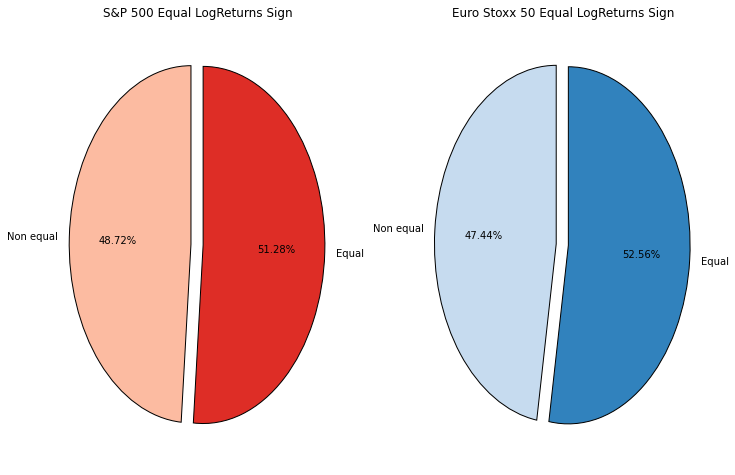

In [12]:
l = 'Non equal', 'Equal' # Labels
e = (0.05, 0.05) # Explode
prc = '%3.2f%%'
 
## Pie chart
f = plt.figure()
ax = f.add_subplot(121)
c = ('#fcbba1','#de2d26') # S&P 500 colours.
ax.pie(s_spx, labels=l, explode=e, autopct=prc, startangle=90, colors=c)
ax.set_title('S&P 500 Equal LogReturns Sign')
 
ax = f.add_subplot(122)
c = ('#c6dbef','#3182bd') # Euro Stoxx 50 colours.
ax.pie(s_stx, labels=l, explode=e, autopct=prc, startangle=90, colors=c)
ax.set_title('Euro Stoxx 50 Equal LogReturns Sign')